In [ ]:
import os
import matplotlib.pyplot as plt
import numpy as np
import random

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


### Arquivos já estão divididos em treino, validação e teste.

In [ ]:
# Referência Raquel
# src_path1 = '/content/gdrive/MyDrive/TrabalhoFinal_CleanDataset'
# train_path = os.path.join(src_path1, 'train_v2')
# train_path_emp = os.path.join(train_path, 'empresas')
# train_path_Nemp = os.path.join(train_path, 'nao_empresas')

# #src_path = '/content/gdrive/MyDrive/619_ProjetoFinal/Dados_ProjetoFinal/split_train_val_test'
# src_path = '/content/gdrive/MyDrive/Dados_ProjetoFinal_MDC010-INF019/split_train_val_test'
# val_path = os.path.join(src_path, 'val')
# test_path = os.path.join(src_path, 'test')

# val_path_emp = os.path.join(val_path, 'imagens_empresas')
# val_path_Nemp = os.path.join(val_path, 'imagens_nao_empresas')

# test_path_emp = os.path.join(test_path, 'imagens_empresas')
# test_path_Nemp = os.path.join(test_path, 'imagens_nao_empresas')

In [ ]:
# Referência Igor
src_path = '/content/gdrive/MyDrive/619_ProjetoFinal/Dados_ProjetoFinal/split_train_val_test'
#src_path = '/content/gdrive/MyDrive/Dados_ProjetoFinal_MDC010-INF019/split_train_val_test'
train_path = os.path.join(src_path, 'train_v2')
val_path = os.path.join(src_path, 'val')
test_path = os.path.join(src_path, 'test')

train_path_emp = os.path.join(train_path, 'imagens_empresas')
train_path_Nemp = os.path.join(train_path, 'imagens_nao_empresas')

val_path_emp = os.path.join(val_path, 'imagens_empresas')
val_path_Nemp = os.path.join(val_path, 'imagens_nao_empresas')

test_path_emp = os.path.join(test_path, 'imagens_empresas')
test_path_Nemp = os.path.join(test_path, 'imagens_nao_empresas')

In [ ]:
print('Número de imagens de empresas (treinamento):', len(os.listdir(train_path_emp)))
print('Número de imagens de não empresas (treinamento):', len(os.listdir(train_path_Nemp)))
print('Número de imagens de empresas (validacao):', len(os.listdir(val_path_emp)))
print('Número de imagens de não empresas (validacao):', len(os.listdir(val_path_Nemp)))
print('Número de imagens de empresas (teste):', len(os.listdir(test_path_emp)))
print('Número de imagens de não empresas (teste):', len(os.listdir(test_path_Nemp)))

#### Imprimindo algumas imagens usadas no treino:

In [ ]:
numeroFiguras = 4

arrImagEmp = os.listdir(train_path_emp)
arrImagEmp = random.sample(arrImagEmp, numeroFiguras)
print(arrImagEmp)

arrImagNEmp = os.listdir(train_path_Nemp)
arrImagNEmp = random.sample(arrImagNEmp, numeroFiguras)
print(arrImagNEmp)

['1119.jpg', '2095.jpg', '2459.jpg', '2307.jpg']
['0.jpg', '1634.jpg', '70.jpg', '4740.jpg']


Imagens de empresas:


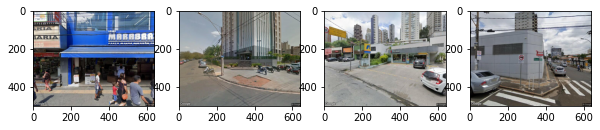

In [ ]:
fig = plt.figure(figsize=(10,5))

print("Imagens de empresas:")
for i in range(4):
    # Imagens de empresas:
    plt.subplot(240 + 1 + i)
    img = plt.imread(os.path.join(train_path_emp,arrImagEmp[i]))
    plt.imshow(img, cmap=plt.get_cmap('gray'))

Imagens de não empresas:


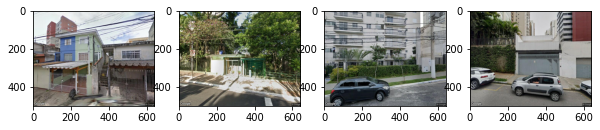

In [ ]:
fig = plt.figure(figsize=(10,5))

print("Imagens de não empresas:")
for i in range(4):
    # Imagens de não empresas:
    z = i + 4
    plt.subplot(240 + 1 + z)
    img = plt.imread(os.path.join(train_path_Nemp,arrImagNEmp[i]))
    plt.imshow(img, cmap=plt.get_cmap('gray'))

### Gerando dados de treino, validação e test.

In [ ]:
import tensorflow as tf
from PIL import Image
from sklearn.utils.class_weight import compute_class_weight
from keras.preprocessing.image import ImageDataGenerator

#Definindo funções úteis para fazer os plots das imagens:
def plotImages(imgList, n_row=1, n_col=1):
    _, axs = plt.subplots(n_row, n_col, figsize=(25,5))
    axs = axs.flatten()
    for img, ax in zip(imgList, axs):
        ax.imshow(np.uint8(img), interpolation='nearest')
    plt.show()

#### Dados sem aumentação.

##### Dados sem pré-processamento.

In [ ]:
# Dados de treino e validação sem aumentação:
train_datagen_sa = tf.keras.preprocessing.image.ImageDataGenerator(
        # shear_range=0.2,
        # zoom_range=0.2,
        # horizontal_flip=True
        )

train_generator_sa = train_datagen_sa.flow_from_directory(
        directory=train_path,
        target_size=(224, 224),
        batch_size=32,
        class_mode='categorical',
        shuffle=False)

validation_generator_sa = train_datagen_sa.flow_from_directory(
        directory=val_path,
        target_size=(224, 224),
        batch_size=32,
        class_mode='categorical',
        shuffle=False)

# Dados de teste:
test_datagen_sa = tf.keras.preprocessing.image.ImageDataGenerator(rotation_range=45)

test_generator_sa = test_datagen_sa.flow_from_directory(
        directory=test_path,
        target_size=(224, 224),
        batch_size=32,
        class_mode='categorical',
        shuffle=False)

batch_X_sa, batch_Y_sa = train_generator_sa.next()

print(batch_X_sa.shape, batch_Y_sa.shape)

# Calcula os pesos:
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(train_generator_sa.labels), y=train_generator_sa.labels)
train_class_weights = dict(enumerate(class_weights))
print('train_class_weights: ', train_class_weights)

Found 6548 images belonging to 2 classes.
Found 2200 images belonging to 2 classes.
Found 2202 images belonging to 2 classes.
(32, 224, 224, 3) (32, 2)
train_class_weights:  {0: 1.2175529936779472, 1: 0.8484063228815756}


##### Dados com pré-processamento para resnet50.

In [ ]:
# Dados de treino e validação sem aumentação para resNet50:
train_datagen_resnet_sa = tf.keras.preprocessing.image.ImageDataGenerator(preprocessing_function=tf.keras.applications.resnet50.preprocess_input                                                                          
        # ,shear_range=0.2,
        # zoom_range=0.2,
        # horizontal_flip=True
        )

train_generator_resnet_sa = train_datagen_resnet_sa.flow_from_directory(
        directory=train_path,
        target_size=(224, 224),
        batch_size=32,
        class_mode='categorical',
        shuffle=False)

validation_generator_resnet_sa = train_datagen_resnet_sa.flow_from_directory(
        directory=val_path,
        target_size=(224, 224),
        batch_size=32,
        class_mode='categorical',
        shuffle=False)

batch_X_resnet_sa, batch_Y_resnet_sa = train_generator_resnet_sa.next()

print(batch_X_resnet_sa.shape, batch_Y_resnet_sa.shape)

Found 6548 images belonging to 2 classes.
Found 2200 images belonging to 2 classes.
(32, 224, 224, 3) (32, 2)


Imagens sem aumentações


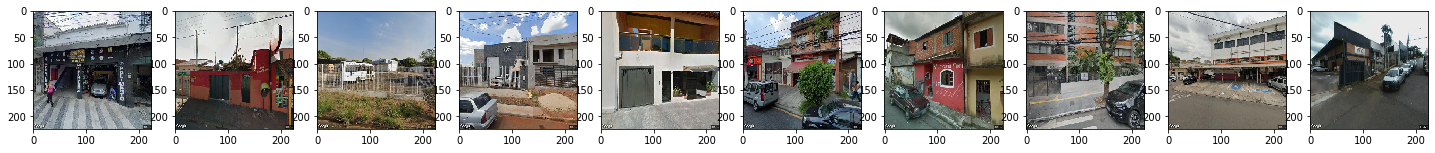

Imagens sem aumentações + pré-processamento resnet


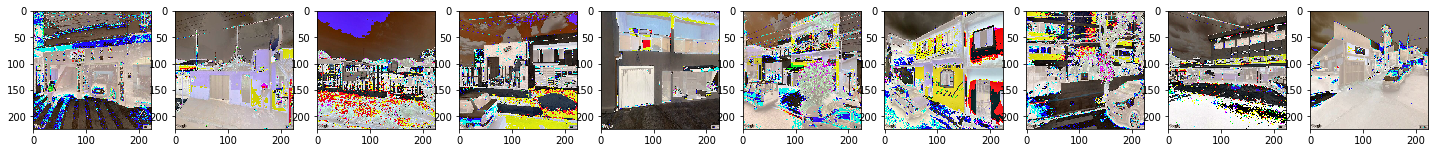

(None, None)

In [ ]:
print("Imagens sem aumentações"), plotImages(batch_X_sa[:10], 1, 10)
print("Imagens sem aumentações + pré-processamento resnet"), plotImages(batch_X_resnet_sa[:10], 1, 10)

#### Dados com aumentação.

##### Dados sem pré-processamento.

In [ ]:
# Dados de treino e validação com aumentação:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

train_generator = train_datagen.flow_from_directory(
        directory=train_path,
        target_size=(224, 224),
        batch_size=32,
        class_mode='categorical',
        shuffle=False)

validation_generator = train_datagen.flow_from_directory(
        directory=val_path,
        target_size=(224, 224),
        batch_size=32,
        class_mode='categorical',
        shuffle=False)

batch_X_train, batch_Y_train = train_generator.next()

Found 6548 images belonging to 2 classes.
Found 2200 images belonging to 2 classes.


##### Dados com pré-processamento para resnet50.

In [ ]:
# Dados de treino e validação com aumentação:
train_datagen_resnet = tf.keras.preprocessing.image.ImageDataGenerator(preprocessing_function=tf.keras.applications.resnet50.preprocess_input,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

train_generator_resnet = train_datagen_resnet.flow_from_directory(
        directory=train_path,
        target_size=(224, 224),
        batch_size=32,
        class_mode='categorical',
        shuffle=False)

validation_generator_resnet = train_datagen_resnet.flow_from_directory(
        directory=val_path,
        target_size=(224, 224),
        batch_size=32,
        class_mode='categorical',
        shuffle=False)

batch_X_train_resnet, batch_Y_train_resnet = train_generator_resnet.next()

print(batch_X_train_resnet.shape, batch_Y_train_resnet.shape)

Found 6548 images belonging to 2 classes.
Found 2200 images belonging to 2 classes.
(32, 224, 224, 3) (32, 2)


Imagens sem aumentações


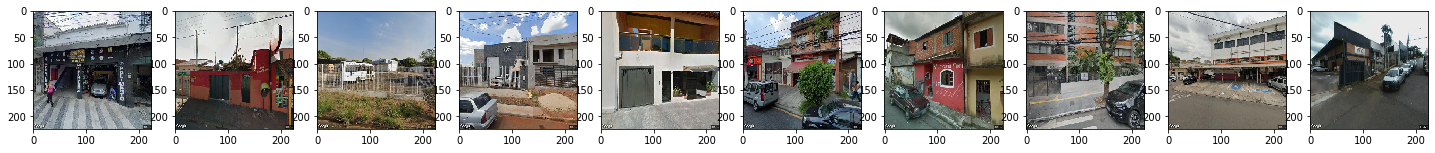

Imagens sem aumentações + pré-processamento resnet


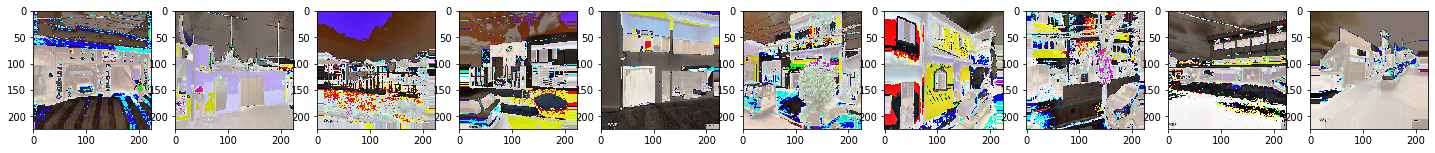

(None, None)

In [ ]:
print("Imagens sem aumentações"), plotImages(batch_X_sa[:10], 1, 10)
print("Imagens sem aumentações + pré-processamento resnet"), plotImages(batch_X_train_resnet[:10], 1, 10)

## Modelo Baseline com ResNet50

####Gerando o modelo.

In [ ]:
# Carregamento do modelo pré-treinado SEM as camadas densas (include_top = False)
model = tf.keras.applications.ResNet50(weights='imagenet', include_top=False, input_shape=(224,224,3))

# Congela camadas pré-treinadas
for layer in model.layers:
    layer.trainable = False

# Insere novas camadas no fim da rede para classificação
modelB = tf.keras.Sequential([
  model,
  tf.keras.layers.GlobalAveragePooling2D(),
  tf.keras.layers.Dense(2, activation='softmax')
])

modelB.summary()

94781440/94765736 [==============================] - 1s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 2)                 4098      
                                                                 
Total params: 23,591,810
Trainable params: 4,098
Non-trainable params: 23,587,712
_________________________________________________________________


####Treinando e avaliando o modelo usando dados sem aumentação.

In [ ]:
# Instancia um otimizador SGD, compila e treina o modelo completo
sgd = tf.keras.optimizers.SGD(learning_rate=0.001, momentum=0.9, decay=0.001, nesterov=True)

modelB.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=[tf.keras.metrics.AUC(),'accuracy'])

history_modelB_sa = modelB.fit(train_generator_resnet_sa, epochs=25, #callbacks=[roc_resnet],
                  validation_data=validation_generator_resnet_sa, class_weight=train_class_weights)

Epoch 1/25
205/205 [==============================] - 1439s 7s/step - loss: 0.7029 - auc_1: 0.8252 - accuracy: 0.7466 - val_loss: 0.5129 - val_auc_1: 0.8864 - val_accuracy: 0.8064
Epoch 2/25
205/205 [==============================] - 143s 698ms/step - loss: 0.5391 - auc_1: 0.8857 - accuracy: 0.8068 - val_loss: 0.7980 - val_auc_1: 0.8528 - val_accuracy: 0.7636
Epoch 3/25
205/205 [==============================] - 141s 686ms/step - loss: 0.5396 - auc_1: 0.8793 - accuracy: 0.7986 - val_loss: 0.4123 - val_auc_1: 0.9188 - val_accuracy: 0.8373
Epoch 4/25
205/205 [==============================] - 147s 718ms/step - loss: 0.4257 - auc_1: 0.9104 - accuracy: 0.8329 - val_loss: 0.4019 - val_auc_1: 0.9190 - val_accuracy: 0.8336
Epoch 5/25
205/205 [==============================] - 160s 781ms/step - loss: 0.4585 - auc_1: 0.8958 - accuracy: 0.8177 - val_loss: 0.6196 - val_auc_1: 0.8781 - val_accuracy: 0.7886
Epoch 6/25
205/205 [==============================] - 162s 789ms/step - loss: 0.4238 - auc_1

In [ ]:
history_modelB_sa.history['val_accuracy']

[0.8063636422157288,
 0.7636363506317139,
 0.8372727036476135,
 0.8336363434791565,
 0.7886363863945007,
 0.8563636541366577,
 0.8600000143051147,
 0.8045454621315002,
 0.8600000143051147,
 0.8563636541366577,
 0.860909104347229,
 0.860909104347229,
 0.8581818342208862,
 0.8445454835891724,
 0.8272727131843567,
 0.8622727394104004,
 0.8004545569419861,
 0.857272744178772,
 0.8490909337997437,
 0.8554545640945435,
 0.8595454692840576,
 0.8313636183738708,
 0.8386363387107849,
 0.8336363434791565,
 0.8445454835891724]

####Salva e importa modelo baseline com dados sem aumentação.

In [ ]:
# Salvando o modelo

import h5py
# save model and architecture to single file
modelB.save("/content/gdrive/MyDrive/Mineracao de Dados Complexos/INF 0619-010 - Trabalho Final - Zanoni/Modelos/modelB_sa.h5")
print("Saved model to disk")

/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


Saved model to disk


In [ ]:
# Carrega pesos salvos.
# modelB.load("/content/gdrive/MyDrive/Mineracao de Dados Complexos/INF 0619-010 - Trabalho Final - Zanoni/Modelos/modelB_sa.h5")
# print("Loaded model from disk")

####Acurácia balanceada com dados sem aumentação.

In [ ]:
#Reseta o gerador para gerar os dados usados no nosso predict.
validation_generator_resnet_sa.reset()

In [ ]:
#Faz a predição à partir dos dados do nosso gerador utilizando o modelo baseline.
y_pred_sa = modelB.predict(validation_generator_resnet_sa)

In [ ]:
# Converte os valores preditos para números inteiros nos valores de 0 ou 1.
y_pred_int_sa = (y_pred_sa > 0.5).astype(np.int32)

In [ ]:
# A lista acima é formada por listas de tamanho 2 onde nos interessa apenas o segundo item de cada lista, portanto o que fazemos nesse trecho é gerar 
# uma nova lista de inteiros selecionando apenas o 2º item de cada lista presente no y_pred_nn.
y_pred_nn_sa = []
for item in y_pred_int_sa:
    y_pred_nn_sa.append(item[1])

In [ ]:
# Novamente faz o reset do gerador para puxarmos os dados do target.
validation_generator_resnet_sa.reset()

In [ ]:
# Gera uma lista com os rótulos de cada imagem.
Y_resnet_val = []

while True:
    x,y = validation_generator_resnet_sa.next()
    
    new_list = []
    for item in y:
        new_list.append(item)
        
    Y_resnet_val += new_list
    if len(Y_resnet_val) > 2200:
        break

In [ ]:
# Acurácia balanceada.
from sklearn.metrics import balanced_accuracy_score
balanced_accuracy_score(validation_generator_resnet_sa.labels, y_pred_nn_sa, sample_weight=None, adjusted=False)

0.8527335305180401

#### Matriz de confusão.

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
np.set_printoptions(precision=4,suppress=True)

# Matriz de confusão
cm = confusion_matrix(validation_generator_resnet.classes, y_pred_nn_sa)



Acurácia balanceada: 0.8527335305180401


Matriz de confusão balanceada


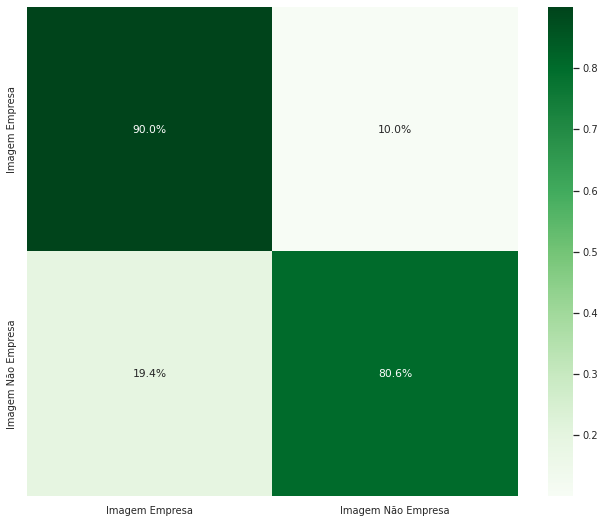

In [ ]:
# Matriz de confusão normalizada
num_classes=2
categories = ['Imagem Empresa', 'Imagem Não Empresa']
cmn = cm / cm.astype(np.float).sum(axis=1, keepdims=True)
balanced_acc = np.trace(cmn) / num_classes
print("\n\nAcurácia balanceada:", balanced_acc)

print("\n\nMatriz de confusão balanceada")
plt.figure(figsize = (11,9))
sns.set(font_scale=0.9)
sns.heatmap(cmn, annot=True, fmt='.1%', xticklabels=categories, yticklabels=categories, cmap = 'Greens')

####Resultados do modelo baseline usando dados sem aumentação.

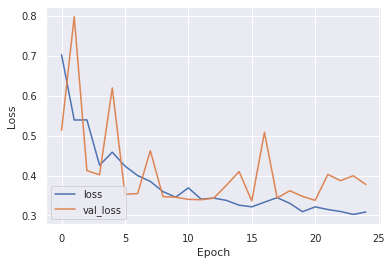

In [ ]:
plt.plot(history_modelB_sa.history['loss'], label='loss')
plt.plot(history_modelB_sa.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='lower left')

#test_loss, test_acc = modelB.evaluate(batch_val_X_proc, batch_val_Y_proc, verbose=2)

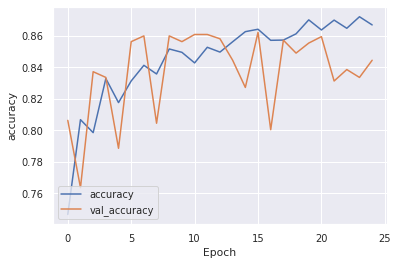

In [ ]:
plt.plot(history_modelB_sa.history['accuracy'], label='accuracy')
plt.plot(history_modelB_sa.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('accuracy')
plt.legend(loc='lower left')

#test_loss, test_acc = frozen_model.evaluate(batch_val_X_proc, batch_val_Y_proc, verbose=2)

####Treinando e avaliando o modelo usando dados com aumentação.

In [ ]:
# Instancia um otimizador SGD, compila e treina o modelo completo
sgd = tf.keras.optimizers.SGD(learning_rate=0.001, momentum=0.9, decay=0.001, nesterov=True)

modelB.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy',tf.keras.metrics.AUC()])

history_modelB = modelB.fit(train_generator_resnet, epochs=25,
                  validation_data=validation_generator_resnet, class_weight=train_class_weights)

Epoch 1/25
205/205 [==============================] - 261s 1s/step - loss: 0.4640 - accuracy: 0.8057 - auc_3: 0.8880 - val_loss: 0.3650 - val_accuracy: 0.8450 - val_auc_3: 0.9215
Epoch 2/25
205/205 [==============================] - 254s 1s/step - loss: 0.4356 - accuracy: 0.8216 - auc_3: 0.9016 - val_loss: 0.3688 - val_accuracy: 0.8445 - val_auc_3: 0.9198
Epoch 3/25
205/205 [==============================] - 254s 1s/step - loss: 0.4341 - accuracy: 0.8268 - auc_3: 0.9053 - val_loss: 0.3871 - val_accuracy: 0.8414 - val_auc_3: 0.9215
Epoch 4/25
205/205 [==============================] - 256s 1s/step - loss: 0.4063 - accuracy: 0.8340 - auc_3: 0.9116 - val_loss: 0.4391 - val_accuracy: 0.8127 - val_auc_3: 0.8911
Epoch 5/25
205/205 [==============================] - 254s 1s/step - loss: 0.3741 - accuracy: 0.8436 - auc_3: 0.9182 - val_loss: 0.3424 - val_accuracy: 0.8595 - val_auc_3: 0.9305
Epoch 6/25
205/205 [==============================] - 255s 1s/step - loss: 0.3840 - accuracy: 0.8387 - au

In [ ]:
history_modelB.history['val_accuracy']

[0.8450000286102295,
 0.8445454835891724,
 0.8413636088371277,
 0.8127272725105286,
 0.8595454692840576,
 0.8063636422157288,
 0.8540909290313721,
 0.8259090781211853,
 0.8559091091156006,
 0.8531818389892578,
 0.8618181943893433,
 0.8486363887786865,
 0.8686363697052002,
 0.8486363887786865,
 0.8290908932685852,
 0.8622727394104004,
 0.8172727227210999,
 0.8500000238418579,
 0.8218181729316711,
 0.864545464515686,
 0.8577272891998291,
 0.8559091091156006,
 0.8700000047683716,
 0.7890909314155579,
 0.8586363792419434]

####Salva e importa modelo baseline.

In [ ]:
# Salvando o modelo

import h5py
# save model and architecture to single file
modelB.save("/content/gdrive/MyDrive/Mineracao de Dados Complexos/INF 0619-010 - Trabalho Final - Zanoni/Modelos/modelB.h5")
print("Saved model to disk")

/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


Saved model to disk


In [ ]:
# Carrega pesos salvos.
# modelB.load("/content/gdrive/MyDrive/Mineracao de Dados Complexos/INF 0619-010 - Trabalho Final - Zanoni/Modelos/modelB.h5")
# print("Loaded model from disk")

####Acurácia balanceada com dados com aumentação.

In [ ]:
#Reseta o gerador para gerar os dados usados no nosso predict.
validation_generator_resnet.reset()

In [ ]:
#Faz a predição à partir dos dados do nosso gerador utilizando o modelo baseline.
y_pred = modelB.predict(validation_generator_resnet)

In [ ]:
# Converte os valores preditos para números inteiros nos valores de 0 ou 1.
y_pred_int = (y_pred > 0.5).astype(np.int32)

In [ ]:
# A lista acima é formada por listas de tamanho 2 onde nos interessa apenas o segundo item de cada lista, portanto o que fazemos nesse trecho é gerar 
# uma nova lista de inteiros selecionando apenas o 2º item de cada lista presente no y_pred_nn.
y_pred_nn = []
for item in y_pred_int:
    y_pred_nn.append(item[1])

In [ ]:
# Novamente faz o reset do gerador para puxarmos os dados do target.
validation_generator_resnet.reset()

In [ ]:
# Gera uma lista com os rótulos de cada imagem.
Y_resnet_val = []

while True:
    x,y = validation_generator_resnet.next()
    
    new_list = []
    for item in y:
        new_list.append(item)
        
    Y_resnet_val += new_list
    if len(Y_resnet_val) > 2200:
        break

In [ ]:
# Acurácia balanceada.
from sklearn.metrics import balanced_accuracy_score
balanced_accuracy_score(validation_generator_resnet.labels, y_pred_nn, sample_weight=None, adjusted=False)

0.8479244903576337

####Resultados do modelo baseline usando dados com aumentação.

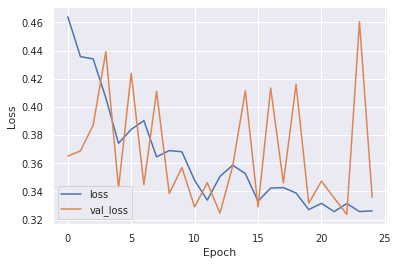

In [ ]:
plt.plot(history_modelB.history['loss'], label='loss')
plt.plot(history_modelB.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='lower left')

#test_loss, test_acc = modelB.evaluate(batch_val_X_proc, batch_val_Y_proc, verbose=2)

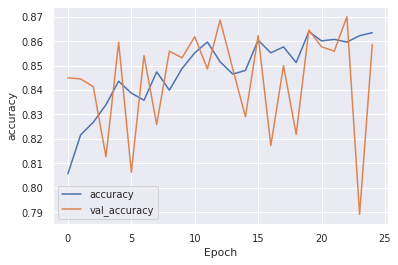

In [ ]:
plt.plot(history_modelB.history['accuracy'], label='accuracy')
plt.plot(history_modelB.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('accuracy')
plt.legend(loc='lower left')

#test_loss, test_acc = frozen_model.evaluate(batch_val_X_proc, batch_val_Y_proc, verbose=2)

In [ ]:
# Matriz de confusão.
import seaborn as sns
from sklearn.metrics import confusion_matrix
np.set_printoptions(precision=4,suppress=True)

# Matriz de confusão
cm = confusion_matrix(validation_generator_resnet.classes, y_pred_nn)



Acurácia balanceada: 0.8479244903576337


Matriz de confusão balanceada


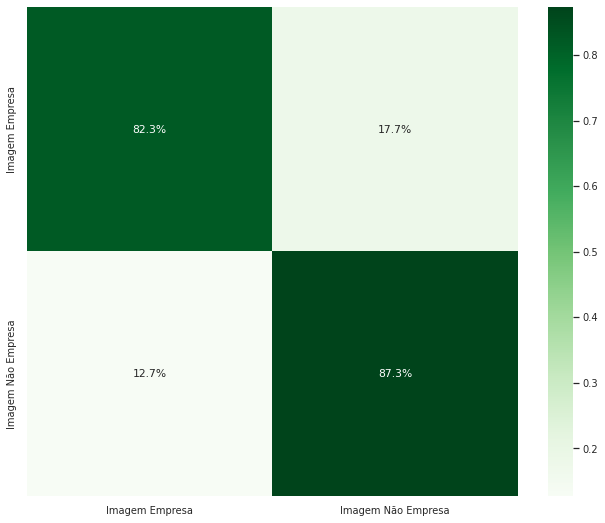

In [ ]:
# Matriz de confusão normalizada
num_classes=2
categories = ['Imagem Empresa', 'Imagem Não Empresa']
cmn = cm / cm.astype(np.float).sum(axis=1, keepdims=True)
balanced_acc = np.trace(cmn) / num_classes
print("\n\nAcurácia balanceada:", balanced_acc)

print("\n\nMatriz de confusão balanceada")
plt.figure(figsize = (11,9))
sns.set(font_scale=0.9)
sns.heatmap(cmn, annot=True, fmt='.1%', xticklabels=categories, yticklabels=categories, cmap = 'Greens')